In [81]:
import pandas as pd

#reading in the dataset and combining all the sheets (years into one dataframe)

df = pd.concat(pd.read_excel('Happiness Dataset Cleansed.xlsx', sheet_name=None), ignore_index=True)


In [2]:
#checking the data. Perceptions of corruption has one missing value, this needs to be corrected in order to train the model.
#that will be taken care in the following blocks of code.
df.count()

Country or region               782
Overall rank                    782
Score                           782
GDP                             782
Social support                  782
Healthy life expectancy         782
Freedom to make life choices    782
Perceptions of corruption       781
Generosity                      782
dtype: int64

In [3]:
#Checking data to see what columns should be left out for the training process
df.head()

,Country or region,Overall rank,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [4]:
#Removing columns that Are not numerical. Rank here also wont matter.

cleaned_for_analysis = df.drop(['Country or region','Overall rank'], axis = 1)

#Observing the data

cleaned_for_analysis.head()

,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [5]:
#As mentioned before. Checking Columns that will return NaN's. 
cleaned_for_analysis.isnull().any()

Score                           False
GDP                             False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Perceptions of corruption        True
Generosity                      False
dtype: bool

In [6]:
#Replacing that value with the mean

cleaned_for_analysis['Perceptions of corruption'] = cleaned_for_analysis['Perceptions of corruption'].fillna(cleaned_for_analysis['Perceptions of corruption'].mean())

In [7]:
#Checking that is worked

cleaned_for_analysis.isnull().any()

Score                           False
GDP                             False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Perceptions of corruption       False
Generosity                      False
dtype: bool

In [16]:
#extracting feature columns to run a train tests split
feature_columns = cleaned_for_analysis[['GDP','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Generosity']]

In [17]:
feature_columns.head()

,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [18]:
X = feature_columns

In [19]:
#Predictor/response variable 

y = cleaned_for_analysis['Score']

In [20]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
777    3.334
778    3.231
779    3.203
780    3.083
781    2.853
Name: Score, Length: 782, dtype: float64

In [24]:
#running the train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
#fitting the linear regression model

from sklearn.linear_model import LinearRegression 

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [26]:
linear_model.intercept_

2.283416795830087

In [27]:
linear_model.coef_

array([1.13041577, 0.61731485, 0.94319882, 1.48380189, 1.08847755,
       0.41068185])

In [28]:
#Based of the linear model we can observe the following coefficients for each of the contributing factors
coefficeints = zip(X,linear_model.coef_)
coefficients_df = pd.DataFrame(list(zip(X,linear_model.coef_)), columns=['features', 'coefficients'])

#Showing the table
coefficients_df



,features,coefficients
0,GDP,1.130416
1,Social support,0.617315
2,Healthy life expectancy,0.943199
3,Freedom to make life choices,1.483802
4,Perceptions of corruption,1.088478
5,Generosity,0.410682


In [32]:
predictions = linear_model.predict(X_test)

In [33]:
#Happiness Score predictions in bland format (only showing 85 here)

predictions[:85]

array([6.7813146 , 7.09391823, 7.14945925, 6.16746797, 5.12653887,
       6.70112034, 4.31192191, 5.0811062 , 3.96631019, 6.91901703,
       5.7075272 , 6.6202036 , 5.23408301, 5.41073238, 4.79350252,
       4.86699026, 5.98247822, 6.29021715, 5.82834644, 4.27170923,
       5.04244302, 4.24768892, 5.23482993, 5.28608682, 5.46869075,
       5.85249707, 5.41809387, 4.43349544, 7.08829473, 4.09267363,
       5.93620632, 4.74347641, 4.01381758, 6.59036996, 5.09822687,
       5.38234798, 5.90175284, 5.05823616, 5.95518643, 4.1293119 ,
       5.02564298, 5.78765142, 6.12550842, 5.66451853, 6.41257472,
       4.94812926, 6.27088935, 4.11080875, 7.05431247, 5.63669425,
       5.03255079, 6.21647762, 4.37373441, 5.07099981, 6.55060118,
       5.75983864, 5.8698401 , 5.76859989, 5.15426288, 4.30287626,
       6.84574848, 4.64432687, 5.76963458, 5.56950193, 5.52599464,
       4.34663367, 3.96820576, 4.6891757 , 6.08027061, 7.08279857,
       3.76262416, 6.99324585, 4.70107572, 5.50747098, 5.94000

In [45]:
#Visualize the predictions 

from chart_studio.plotly import iplot
import plotly.graph_objects as go
from plotly.offline import iplot

trace = go.Scatter(
    x=y_test,
    y=predictions,
    mode = 'lines+markers', opacity = 0.75
    
)
data = [trace]
layout = go.Layout(
    title='How Accurate Were The Predictions?',
    
    xaxis = dict(title='Happiness Score'),
    
    yaxis= dict(title='Predicted Happiness Score')
)


fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [53]:
#How accurate was the model based on maE, MSE, RMSE 

from sklearn import metrics 
import numpy as np

print(metrics.mean_absolute_error(y_test,predictions))

print(metrics.mean_squared_error(y_test,predictions))

print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.46713093797330624
0.38172938251888544
0.6178425224269413


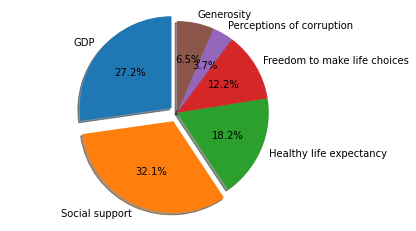

In [55]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'GDP','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Generosity'
sizes = cleaned_for_analysis[['GDP','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Generosity']].mean()
explode = (0.08, 0.1, 0, 0,0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [57]:
score_average = cleaned_for_analysis['Score'].mean()

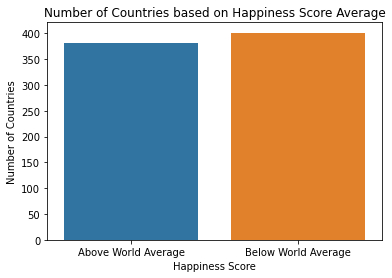

In [60]:
import seaborn as sns

above_mean_HS =['Above World Average' if i >= score_average else 'Below World Average' for i in cleaned_for_analysis.Score]
df = pd.DataFrame({'Happiness_Score' : above_mean_HS})
sns.countplot(x = df.Happiness_Score)
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Happiness Score Average', color = 'black', fontsize = 12)
plt.show()

In [88]:
df2 = df = pd.concat(pd.read_excel('Happiness Dataset Cleansed.xlsx', sheet_name=None), ignore_index=True)

import plotly.graph_objs as go

df_WorldAverages = df.iloc[:5, :]


import plotly.graph_objs as go

trace1 = {
  'x': df_WorldAverages['Country or region'],
  'y': df_WorldAverages.GDP,
  'name': 'GDP',
  'type': 'bar'
};
trace2 = {
  'x': df_WorldAverages['Country or region'],
  'y': df_WorldAverages['Social support'],
  'name': 'Social support',
  'type': 'bar'
};
trace3 = {
  'x': df_WorldAverages['Country or region'],
  'y': df_WorldAverages['Healthy life expectancy'],
  'name': 'Healthy life expectancy',
  'type': 'bar'
};
trace4 = {
  'x': df_WorldAverages['Country or region'],
  'y': df_WorldAverages['Freedom to make life choices'],
  'name': 'Freedom to make life choices',
  'type': 'bar'
};
trace5 = {
  'x': df_WorldAverages['Country or region'],
  'y': df_WorldAverages['Perceptions of corruption'],
  'name': 'Perceptions of corruption',
  'type': 'bar'
};
trace6 = {
  'x': df_WorldAverages['Country or region'],
  'y': df_WorldAverages['Generosity'],
  'name': 'Generosity',
  'type': 'bar'
};
data = [trace1, trace2, trace3, trace4, trace5, trace6];
layout = {
  'xaxis': {'title': 'Top 5 Countries'},
  'barmode': 'relative',
  'title': 'Top 5 Countries According to the Different Parameters'
};

fig = go.Figure(data = data, layout = layout)
iplot(fig)